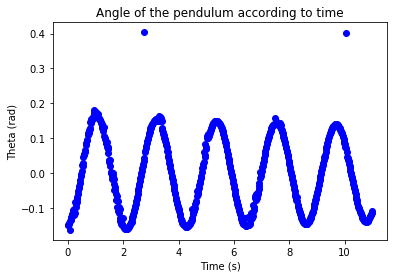

In [8]:
# Find the max speed of a pendulum to verify the experiment
# Setup and calculate angle according to time
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

# Fetch the data
data = np.genfromtxt('csv/pendulum_2.csv', delimiter=',')

# Params of the video
fps = 59.94
dt = 1.0 / fps

# Params exp.
L = 1.1811 # Length of the rope (m)
m_to_px = 0.001528461 # Convert factor (m / px)
L_px = L / m_to_px # Length of the rope (px)
g = 9.8

# Number of points
N = data.shape[0]

# Init time array (X on the plot)
t = np.zeros((N))
for i in range(N):
    t[i] = i * dt
    
# Get angle of the pendulum
x_mean = np.mean(data[:, 0])
a = data[:, 0] - x_mean
theta = np.arcsin(a/L_px)

# Show the results
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Angle of the pendulum according to time')

plt.plot(t, theta, 'bo', label='sampled')
plt.show()

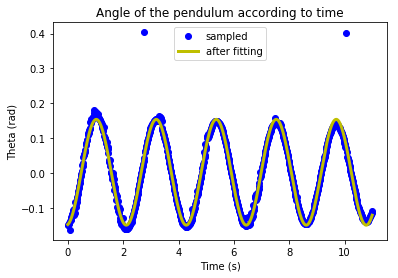

In [11]:
# Find the equation of the sine

# Guess some parameters as the optimisation is greedy (fall in local minimums)
guess_freq = np.sqrt(g/L) # angular speed 
guess_amplitude = 3*np.std(theta)/(2**0.5)
guess_phase = 0
guess_offset = np.mean(theta)

# Define function to optimize (amp, freq, phase, offset)
optimize_func = lambda x: x[0] * np.sin(t * x[1] + x[2]) + x[3] - theta

# Get params estimations
amplitude, freq, phase, offset = leastsq(optimize_func, 
                                            [guess_amplitude, guess_freq, 
                                             guess_phase, guess_offset])[0]
# Make 'data' to show on plot
data_fit = amplitude*np.sin(t * freq + phase) + offset

# Show the result
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Angle of the pendulum according to time')

plt.plot(t, theta, 'bo', label='sampled')
plt.plot(t, data_fit, label='after fitting', linewidth=3, color='y')
plt.legend()
plt.show()

In [10]:
# Get max speed
max_speed = amplitude * freq
print(max_speed)

0.439736424607
